# Analyse des ventes de la librairie LAPAGE
## Partie 1 : Préparation de la dataframe <br>
Importation des librairies 

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
import numpy as np
import math

Importation des données 

In [39]:
products=pd.read_csv(r"C:\Users\hindm\OneDrive\Bureau\ocr\projet6\products.csv")
customers=pd.read_csv(r"C:\Users\hindm\OneDrive\Bureau\ocr\projet6\customers.csv")
transactions=pd.read_csv(r"C:\Users\hindm\OneDrive\Bureau\ocr\projet6\transactions.csv")

## Partie 1: Exploration des données

In [40]:
products.info()
customers.info()
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_i

On remarque qu'on a pas de valeurs manquantes sur toutes les tables <br>

**Analyse de la table produits** <br>
vérification des doublons

In [41]:
len(products[products['id_prod'].duplicated()==True])

0

la clé prmaire de la table product est 'id_prod'(unique et non null) <br>

In [42]:
products.describe(include="all")

,id_prod,price,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


Exploration des catégories 

In [43]:
products["categ"].unique()

array([0, 1, 2], dtype=int64)

On a 3 catégories : 0, 1, 2 mais sous forme d'entier et c est ue variable qualitative donc on les convertis en chaine de caractéres 

In [44]:
products["categ"]=products["categ"].astype(str)
products["categ"].unique()

array(['0', '1', '2'], dtype=object)

On remarque que le minimum des prix est négatif (peut étre une faute de frappe ) on analyse ses produits

In [45]:
products[products["price"] <= 0]

,id_prod,price,categ
731,T_0,-1.0,0


Le produit T_0 appartien à la catégorie 0 , On analyse les prix des produits de cette catégorie

In [46]:
products[products['categ']=="0"]["price"].describe()

count    2309.000000
mean       11.727280
std         7.568756
min        -1.000000
25%         5.580000
50%        10.320000
75%        16.650000
max        40.990000
Name: price, dtype: float64

On peut conclure que c'est une erreur lexicale ( à la place de 1 on a -1) vu que :
25% des prix est inférieur à 5 euros 
les 10 premiers prix sont proche de la valeur 1 <br>
action : convertir le prix negatif en positif <br>
Note:**le prix (-1) est aussi souvent utilisé pour les tests surtout que le id_produit= T_0, mais nous attendant d'avoir une confirmation que c est un produits test pour le supprimer de la dataframe**<br>

In [47]:
products["price"]=products["price"].replace(-1,1)
products[products['id_prod']=="T_0"]

,id_prod,price,categ
731,T_0,1.0,0


Analyse des prix outliers

Text(0.5, 1.0, 'analyse des prix des produits ')

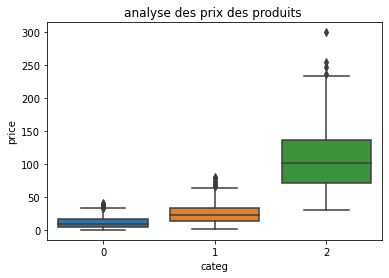

In [48]:
sns.boxplot(x='categ',y='price',data=products,orient='v')
plt.title("analyse des prix des produits ")

pas de valeurs aberrantes dans les catégories ( les outliers représente des produits un peu plus cher que le reste )<br>
**Analyse de la table customers**

In [49]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [50]:
customers["birth"].describe()

count    8623.000000
mean     1978.280877
std        16.919535
min      1929.000000
25%      1966.000000
50%      1979.000000
75%      1992.000000
max      2004.000000
Name: birth, dtype: float64

Text(0.5, 1.0, 'distribution des dates de naissance de nos clients')

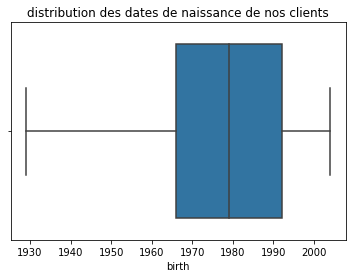

In [51]:
sns.boxplot(x='birth',data=customers)
plt.title("distribution des dates de naissance de nos clients")

Pas de valeur aberrante pour les date de naissance , on peut ajouter une colonne 'age'

In [52]:
customers['age']=datetime.datetime.now().year - customers['birth']
customers['age'].describe()

count    8623.000000
mean       43.719123
std        16.919535
min        18.000000
25%        30.000000
50%        43.000000
75%        56.000000
max        93.000000
Name: age, dtype: float64

**On remarque que l'age minimum c est 18ans , donc peut etre que la création d'un compte client necessite des identifiants bancaires alors l'information sur l'age des clients ne nous donne pas forcément un idée sur le type des livres acheté**<br>
Aucune valeur d'age aberrante detecté <br>
on analyse les valeurs de la colonne sex 

In [53]:
customers['sex'].unique()

array(['f', 'm'], dtype=object)

In [54]:
len(customers[customers['client_id'].duplicated()==True])

0

la clé prmaire de la table customers est ' client_id ' (unique et non null) <br>
**Analyse de la table transactions**

In [55]:
transactions.info()
transactions.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [56]:
transactions[transactions["date"].str.contains('test')]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


on a 200 lignes de test sur 679532 observation , donc on garde que les observations réelles 

In [57]:
transactions=transactions[~transactions["date"].str.contains('test')]
transactions['date'].describe()

count                         679332
unique                        679332
top       2022-05-20 13:21:29.043970
freq                               1
Name: date, dtype: object

crée une variable "hour" et convertir la variable date du type object au type datetime en gardant que l'année , le mois et le jour 

In [58]:
transactions['date']

0         2022-05-20 13:21:29.043970
1         2022-02-02 07:55:19.149409
2         2022-06-18 15:44:33.155329
3         2021-06-24 04:19:29.835891
4         2023-01-11 08:22:08.194479
                     ...            
679527    2022-01-15 13:05:06.246925
679528    2022-03-19 16:03:23.429229
679529    2022-12-20 04:33:37.584749
679530    2021-07-16 20:36:35.350579
679531    2022-09-28 01:12:01.973763
Name: date, Length: 679332, dtype: object

In [59]:
transactions['hour']=pd.to_datetime(transactions['date']).dt.hour
transactions['date']= pd.to_datetime(transactions['date']).dt.strftime('%Y-%m-%d')
transactions['date']= pd.to_datetime(transactions['date'])
transactions['date1']= pd.to_datetime(transactions['date']).dt.strftime('%Y-%m')
transactions['date1']= pd.to_datetime(transactions['date1'])
transactions.info()
transactions

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   hour        679332 non-null  int64         
 5   date1       679332 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 36.3+ MB


,id_prod,date,session_id,client_id,hour,date1
0,0_1518,2022-05-20,s_211425,c_103,13,2022-05-01
1,1_251,2022-02-02,s_158752,c_8534,7,2022-02-01
2,0_1277,2022-06-18,s_225667,c_6714,15,2022-06-01
3,2_209,2021-06-24,s_52962,c_6941,4,2021-06-01
4,0_1509,2023-01-11,s_325227,c_4232,8,2023-01-01
...,...,...,...,...,...,...
679527,0_1551,2022-01-15,s_150195,c_8489,13,2022-01-01
679528,1_639,2022-03-19,s_181434,c_4370,16,2022-03-01
679529,0_1425,2022-12-20,s_314704,c_304,4,2022-12-01
679530,0_1994,2021-07-16,s_63204,c_2227,20,2021-07-01


rapprocher les tables

In [60]:
df=pd.merge(transactions,products,on='id_prod', how='outer', indicator=True)

In [61]:
df[df["_merge"]=="right_only"]

,id_prod,date,session_id,client_id,hour,date1,price,categ,_merge
679332,0_1016,NaT,NaN,NaN,NaN,NaT,35.06,0,right_only
679333,0_1780,NaT,NaN,NaN,NaN,NaT,1.67,0,right_only
679334,T_0,NaT,NaN,NaN,NaN,NaT,1.00,0,right_only
679335,0_1062,NaT,NaN,NaN,NaN,NaT,20.08,0,right_only
679336,0_1119,NaT,NaN,NaN,NaN,NaT,2.99,0,right_only
679337,0_1014,NaT,NaN,NaN,NaN,NaT,1.15,0,right_only
679338,1_0,NaT,NaN,NaN,NaN,NaT,31.82,1,right_only
679339,0_1318,NaT,NaN,NaN,NaN,NaT,20.92,0,right_only
679340,0_1800,NaT,NaN,NaN,NaN,NaT,22.05,0,right_only
679341,0_1645,NaT,NaN,NaN,NaN,NaT,2.99,0,right_only


l’ensemble des 22 produits qui ne sont jamais vendu, il faut verifier leur état de stock et la disponibilité , je partage la liste avec le service logistique,achat sous le nom « invendu »

In [62]:
invendus=df[df["_merge"]=="right_only"]
invendus.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 679332 to 679353
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id_prod     22 non-null     object        
 1   date        0 non-null      datetime64[ns]
 2   session_id  0 non-null      object        
 3   client_id   0 non-null      object        
 4   hour        0 non-null      float64       
 5   date1       0 non-null      datetime64[ns]
 6   price       22 non-null     float64       
 7   categ       22 non-null     object        
 8   _merge      22 non-null     category      
dtypes: category(1), datetime64[ns](2), float64(2), object(4)
memory usage: 1.7+ KB


On verifier les ventes ou nous avons pas d’informations sur le produit

In [63]:
df[df["_merge"]=="left_only"]

,id_prod,date,session_id,client_id,hour,date1,price,categ,_merge
542560,0_2245,2022-09-23,s_272266,c_4746,7.0,2022-09-01,NaN,NaN,left_only
542561,0_2245,2022-07-23,s_242482,c_6713,9.0,2022-07-01,NaN,NaN,left_only
542562,0_2245,2022-12-03,s_306338,c_5108,3.0,2022-12-01,NaN,NaN,left_only
542563,0_2245,2021-08-16,s_76493,c_1391,11.0,2021-08-01,NaN,NaN,left_only
542564,0_2245,2022-07-16,s_239078,c_7954,5.0,2022-07-01,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
542776,0_2245,2021-08-25,s_80395,c_131,9.0,2021-08-01,NaN,NaN,left_only
542777,0_2245,2022-03-06,s_175311,c_4167,19.0,2022-03-01,NaN,NaN,left_only
542778,0_2245,2022-05-16,s_209381,c_4453,11.0,2022-05-01,NaN,NaN,left_only
542779,0_2245,2022-02-11,s_163405,c_1098,9.0,2022-02-01,NaN,NaN,left_only


In [64]:
df[df["_merge"]=="left_only"]["id_prod"].unique()

array(['0_2245'], dtype=object)

In [65]:
df[df["id_prod"]=="0_2245"]["id_prod"].count()

221

**On remarque que le produits 0_2245 est vendu 221 fois alors qu'il est pas géré par le stock (pas d'information sur le produit) on suppose que c est un bon d'achat et on véréfier avec le service facturation**<br>
le service facturation confirme que c est un bon d'achat donc on l'enléve de notre base de données .

In [66]:
df=df[df["_merge"]=="both"].copy()
del df["_merge"]

Rapprocher la df à la table client

In [67]:
df=pd.merge(df,customers,on='client_id', how='outer', indicator=True)

liste des clients qui n’ont pas encore acheter chez nous , donc des prospects , on propose d’elaborer une liste séparer pour les prospects pour mieux cibler nos compagnes de prospection
je partage avec le service marketing la liste sous le nom prospects

In [68]:
df[df["_merge"]=="right_only"]

,id_prod,date,session_id,client_id,hour,date1,price,categ,sex,birth,age,_merge
679111,NaN,NaT,NaN,c_8253,NaN,NaT,NaN,NaN,f,2001,21,right_only
679112,NaN,NaT,NaN,c_3789,NaN,NaT,NaN,NaN,f,1997,25,right_only
679113,NaN,NaT,NaN,c_4406,NaN,NaT,NaN,NaN,f,1998,24,right_only
679114,NaN,NaT,NaN,ct_0,NaN,NaT,NaN,NaN,f,2001,21,right_only
679115,NaN,NaT,NaN,c_2706,NaN,NaT,NaN,NaN,f,1967,55,right_only
679116,NaN,NaT,NaN,c_3443,NaN,NaT,NaN,NaN,m,1959,63,right_only
679117,NaN,NaT,NaN,c_4447,NaN,NaT,NaN,NaN,m,1956,66,right_only
679118,NaN,NaT,NaN,c_3017,NaN,NaT,NaN,NaN,f,1992,30,right_only
679119,NaN,NaT,NaN,c_4086,NaN,NaT,NaN,NaN,f,1992,30,right_only
679120,NaN,NaT,NaN,c_6930,NaN,NaT,NaN,NaN,m,2004,18,right_only


In [69]:
prospects=df[df["_merge"]=="right_only"][["client_id","sex","age"]].copy()
prospects.head()

,client_id,sex,age
679111,c_8253,f,21
679112,c_3789,f,25
679113,c_4406,f,24
679114,ct_0,f,21
679115,c_2706,f,55


on vérifie si on a des transactions sans les identifiants clients

In [33]:
df[df["_merge"]=="left_only"]

,id_prod,date,session_id,client_id,hour,date1,price,categ,sex,birth,age,_merge


on comprends que chaque achat nécessite d’avoir un compte client

In [34]:
df=df[df["_merge"]=="both"].copy()
del df["_merge"]
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679111 non-null  object        
 1   date        679111 non-null  datetime64[ns]
 2   session_id  679111 non-null  object        
 3   client_id   679111 non-null  object        
 4   hour        679111 non-null  float64       
 5   date1       679111 non-null  datetime64[ns]
 6   price       679111 non-null  float64       
 7   categ       679111 non-null  object        
 8   sex         679111 non-null  object        
 9   birth       679111 non-null  int64         
 10  age         679111 non-null  int64         
dtypes: datetime64[ns](2), float64(2), int64(2), object(5)
memory usage: 62.2+ MB


In [35]:
df

,id_prod,date,session_id,client_id,hour,date1,price,categ,sex,birth,age
0,0_1518,2022-05-20,s_211425,c_103,13.0,2022-05-01,4.18,0,f,1986,36
1,0_1518,2021-07-20,s_64849,c_103,13.0,2021-07-01,4.18,0,f,1986,36
2,0_1518,2022-08-20,s_255965,c_103,13.0,2022-08-01,4.18,0,f,1986,36
3,0_1418,2022-06-18,s_225411,c_103,1.0,2022-06-01,8.57,0,f,1986,36
4,0_1418,2021-08-18,s_77214,c_103,1.0,2021-08-01,8.57,0,f,1986,36
...,...,...,...,...,...,...,...,...,...,...,...
679106,2_147,2021-07-23,s_65994,c_4391,7.0,2021-07-01,181.99,2,f,2001,21
679107,0_142,2022-03-25,s_184472,c_1232,18.0,2022-03-01,19.85,0,f,1960,62
679108,0_142,2021-09-25,s_95415,c_1232,18.0,2021-09-01,19.85,0,f,1960,62
679109,2_205,2021-03-11,s_4605,c_7534,0.0,2021-03-01,100.99,2,m,1992,30


In [36]:
df.to_csv (r"C:\Users\hindm\OneDrive\Bureau\ocr\projet6\data_frame.csv", index = False, header=True)